<a href="https://colab.research.google.com/github/sheikhi-a/Data_science_with_python/blob/main/regression_CV_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



#Simple  and Multiple Regression
### Ayyub Sheikhi
### Department of statistics, Shahid Bahonar University of Kerman, Iran


*Regression using direct computation*

In [ ]:

import numpy as np
from numpy import array


data = array([
	[4, 14.5],
	[5, 15.5],
	[3.5, 14.2],
	[5, 15.3],
	[5, 15.2],
	[4.5,14.8],
	[6,16.1],
	[4,14.6],
  [5.5, 15.8]
	])

X, Y = data[:,0], data[:,1]
X
Y

n=len(X)
n
X_bar = np.mean(X)
print(X_bar  )
Y_bar = np.mean(Y)
Y_bar
n*X_bar*Y_bar


numerator = np.sum(X  * Y )- n*X_bar*Y_bar
denominator = np.sum(X**2)- n*X_bar**2

#denominator = np.sum(X**2) - n*(X_mean)**2

beta_hat_1 = numerator / denominator
print(beta_hat_1)
beta_hat_0= Y_bar - beta_hat_1 * X_bar


print("The regression equation is:   \n   ", "Avg=",beta_hat_0, "+", beta_hat_1,"study" )

print("the regression equation  between study and score is:   \n   ", "avg=",beta_hat_0, "+", beta_hat_1,"study" )




4.722222222222222
0.7868131868131852
The regression equation is:   
    Avg= 11.395604395604403 + 0.7868131868131852 study
the regression equation  between study and score is:   
    avg= 11.395604395604403 + 0.7868131868131852 study


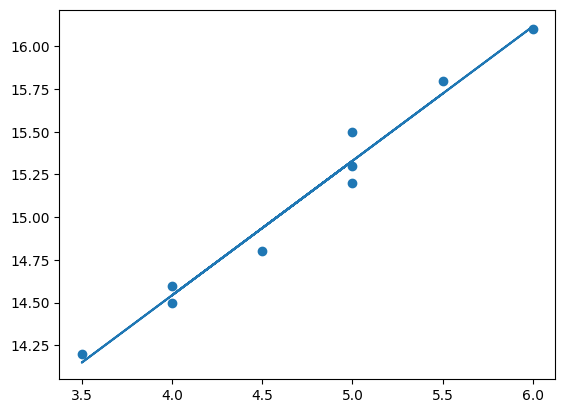

In [ ]:
import matplotlib.pyplot as plt

yhat = beta_hat_0+beta_hat_1*X
np.vstack((Y, yhat))

plt.scatter(X, Y)

plt.plot(X, yhat) # regression line


**Make a prediction**

In [ ]:
x_new=3.4
ynew_hat=beta_hat_0+beta_hat_1*x_new
print(ynew_hat)



14.070769230769233


**Error in prediction**


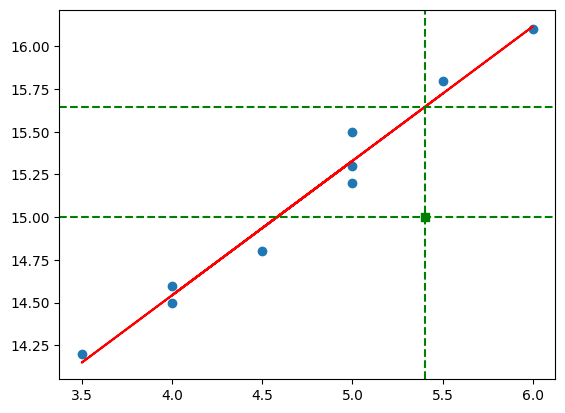

In [ ]:
yhat = beta_hat_0+beta_hat_1*X

#e=y-yhat

new_x=5.4
new_y=15
new_y_hat=beta_hat_0+beta_hat_1*new_x
error_new_x=new_y-new_y_hat

plt.scatter(X, Y)
plt.plot(X, yhat, color='red')
plt.scatter(new_x, new_y, color='green',marker='s')
plt.axvline(x=new_x, color='green', linestyle='--')

plt.axhline(y=new_y, color='green', linestyle='--')
plt.axhline(y=new_y_hat, color='green', linestyle='--')

4.5
The regression equation is:   
    Score= 5.029929577464788 + -0.4788732394366197 study


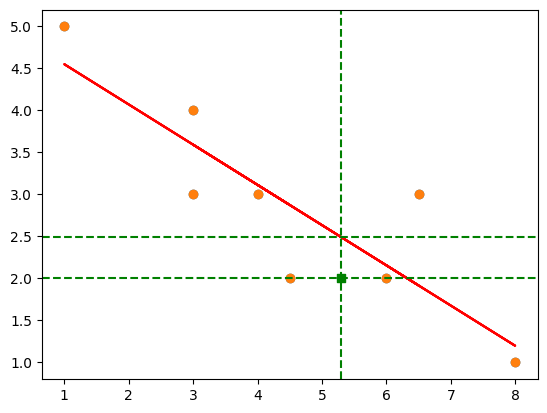

In [ ]:
#another example


data = array([
	[4, 3],
	[8, 1],
	[1, 5],
	[3, 3],
	[4.5, 2],
	[3,4],
	[6.5,3],
	[6,2]
	])

X, Y = data[:,0], data[:,1]
X
Y

n=len(X)
n
X_bar = np.mean(X)
print(X_bar)
Y_bar = np.mean(Y)
Y_bar
n*X_bar*Y_bar


numerator = np.sum(X  * Y )- n*X_bar*Y_bar
denominator = np.sum(X**2)- n*X_bar**2

#denominator = np.sum(X**2) - n*(X_mean)**2

beta_hat_1 = numerator / denominator
beta_hat_0= Y_bar - beta_hat_1 * X_bar


print("The regression equation is:   \n   ", "Score=",beta_hat_0, "+", beta_hat_1,"study" )


yhat = beta_hat_0+beta_hat_1*X
plt.scatter(X, Y)
plt.plot(X, yhat, color='red')

new_x=5.3
new_y=2
new_y_hat=beta_hat_0+beta_hat_1*new_x
error_new_x=new_y-new_y_hat

plt.scatter(X, Y)
plt.plot(X, yhat, color='red')
plt.scatter(new_x, new_y, color='green',marker='s')
plt.axvline(x=new_x, color='green', linestyle='--')

plt.axhline(y=new_y, color='green', linestyle='--')
plt.axhline(y=new_y_hat, color='green', linestyle='--')


#Regression Using packages


In [ ]:

import pandas as pd
from sklearn.linear_model import LinearRegression

df=pd.DataFrame(data)
df.head()
df = df.rename(columns={0: 'X', 1: 'Y'}) # you may need inplace=True


x = df[['X']] #PREDICTOR
y =df['Y']# DEPENDENT

reg_model = LinearRegression()
reg_model.fit(x, y)
reg_model.coef_
reg_model.intercept_
beta_hat_1 = reg_model.coef_
beta_hat_0 = reg_model.intercept_


print("the regression equation is:      ", "Avg=",beta_hat_0, "+", beta_hat_1,"study" )

print("the  predicted value of y if x=8 is:   \n   ", "y_hat=",beta_hat_0+beta_hat_1*8 )


#Multiple Approach for Simple model

In [ ]:
from numpy.linalg import inv
X = X.reshape((len(X), 1))  # reshape X  to a vector
X.shape

X = np.hstack((np.ones((X.shape[0], 1)), X))
X.shape

B_h = inv(X.T.dot(X)).dot(X.T).dot(Y)
print(B_h)

print("the regression equation is:      ", "Y=",B_h[0], "+", B_h[1],"X")
print("the  predicted value of score  y if x=5 is:   \n   ", "y_hat=",B_h[0]+B_h[1]*5 )


the regression equation is:       Y= 11.395604395604426 + 0.7868131868131856 X


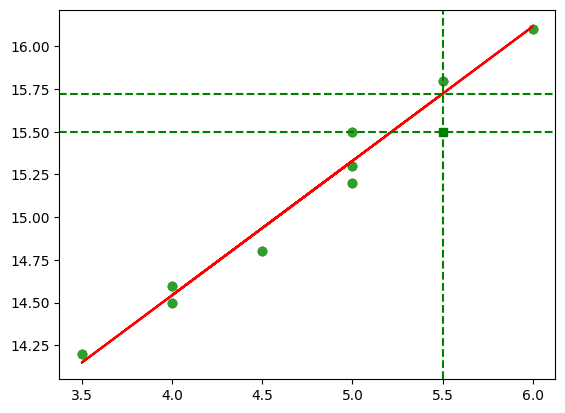

In [ ]:
import matplotlib.pyplot as plt

yhat = X.dot(B_h)# predicted value of y
y
yhat
plt.scatter(X[:,1], y)

plt.scatter(X[:,1], y)
plt.plot(X[:,1], yhat, color='red') # regression line


new_x=5.5
new_y=15.5
new_y_hat=beta_hat_0+beta_hat_1*new_x
error_new_x=new_y-new_y_hat

plt.scatter(X[:,1], y)
plt.plot(X[:,1], yhat, color='red')
plt.scatter(new_x, new_y, color='green',marker='s')
plt.axvline(x=new_x, color='green', linestyle='--')

plt.axhline(y=new_y, color='green', linestyle='--')
plt.axhline(y=new_y_hat, color='green', linestyle='--')




In [ ]:
from scipy.stats import pearsonr

corr = pearsonr(yhat, y)
corr.correlation
np.vstack((y, yhat))



array([[14.5       , 15.5       , 14.2       , 15.3       , 15.2       ,
        14.8       , 16.1       , 14.6       , 15.8       ],
       [14.54285714, 15.32967033, 14.14945055, 15.32967033, 15.32967033,
        14.93626374, 16.11648352, 14.54285714, 15.72307692]])

# Multilple Regression

In [ ]:
data = array([
	[0.05, 3, 0.12],
	[0.18, 4,  0.22],
	[0.31,8, 0.95],
	[0.42, 5, 0.38],
	[0.35,1,  0.49],
	])
X, y = data[:,0:2], data[:,2]
X = np.hstack((np.ones((X.shape[0], 1)), X))

X.shape

B = inv(X.T.dot(X)).dot(X.T).dot(y)
print(B)

print("the regression equation is: \n     ", "Y=",B[0], "+", B[1],"X1",'+', B[2], 'X2' )

yhat = X.dot(B)
plt.scatter(y, yhat)
from scipy.stats import pearsonr
corr = pearsonr(yhat, y)
print(corr)

X_new=array([0.45,3])
y_new=0.6

X_new = np.hstack((np.ones(1), X_new))


y_hat_new=X_new.dot(B)
y_hat_new
error_in_prediction=y_new-y_hat_new
print("the  error in prediction  y if x=[0.45,3] is:   \n   ", "e_i=",error_in_prediction)



the  error in prediction  y if x=[0.45,3] is:   
    e_i= 0.06831216263394035


#3D visualization

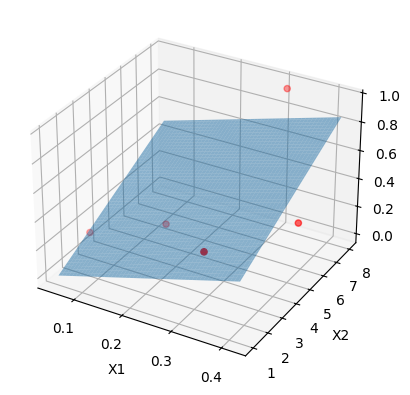

In [ ]:

from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 1], X[:, 2], y, c='r', marker='o')

x1_surf = np.linspace(min(X[:, 1]), max(X[:, 1]), 100)
x2_surf = np.linspace(min(X[:, 2]), max(X[:, 2]), 100)
X1_surf, X2_surf = np.meshgrid(x1_surf, x2_surf)

yhat_surf = B[0] + B[1]*X1_surf + B[2]*X2_surf

ax.plot_surface(X1_surf, X2_surf, yhat_surf, alpha=0.5)


ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('y')

plt.show()


# Surface plot using simulated data

[2.06496047 3.12008309 1.1584719 ]


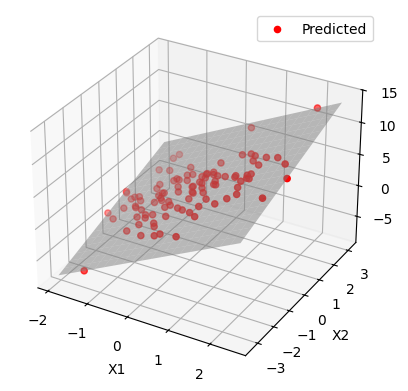

In [ ]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt

n = 100
X1_sim = norm.rvs(0, 1, n)
X2_sim = norm.rvs(0, 1, n)
y_sim = 2 + 3*X1_sim + X2_sim + norm.rvs(0, 2, n)

X_sim = np.column_stack((np.ones(n), X1_sim, X2_sim))
B = np.linalg.inv(X_sim.T.dot(X_sim)).dot(X_sim.T).dot(y_sim)
print(B)

y_hat = X_sim.dot(B)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

#ax.scatter(X_sim[:, 1], X_sim[:, 2], y_sim, color='blue', label='Actual')

ax.scatter(X_sim[:, 1], X_sim[:, 2], y_hat, color='red', label='Predicted')

x1_surf = np.linspace(min(X_sim[:, 1]), max(X_sim[:, 1]), 20)
x2_surf = np.linspace(min(X_sim[:, 2]), max(X_sim[:, 2]), 20)
X1_mesh, X2_mesh = np.meshgrid(x1_surf, x2_surf)
yhat_surf = B[0] + B[1]*X1_mesh + B[2]*X2_mesh

ax.plot_surface(X1_mesh, X2_mesh, yhat_surf, alpha=0.5, color='gray')

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('y')
plt.legend()
plt.show()

In [ ]:
df=pd.DataFrame(data)
df.head()
df = df.rename(columns={0: 'X1', 1: 'X2', 2: 'Y'}) # you may need inplace=True


x = df[['X1', 'X2']] #PREDICTOR
y =df['Y']# DEPENDENT

reg_model = LinearRegression()
reg_model.fit(x, y)

beta_hat = reg_model.coef_
beta_hat_0 = reg_model.intercept_





np.float64(-0.11611542283212917)

In [ ]:
data_new = array([
	[0.05, 6, 0.02],
	[0.11, 4,  0.5],
  [0.45, 8,  0.6]])

x_new=data_new[:,0:2]
y_new=data_new[:,2]

y_hat_new=reg_model.predict(x_new)

corr = pearsonr(y_hat_new, y_new)
corr


ss_test=np.sum((y_new-y_hat_new)**2)
ss_test



np.float64(0.24079122759991928)

In [ ]:
import pandas as pd
real_data = pd.read_csv("data_bmi.csv")
real_data.shape
real_data.columns

real_data = real_data.rename(columns={'TEMP( 0F)': 'TEMP'})
real_data = real_data.rename(columns={'TEMP( 0F)': 'TEMP', 'EXERCISE LEVEL': 'Exer'})


real_data.tail()
from statistics import mean
real_data.FFNUM[16]=mean(real_data.FFNUM)
real_data.tail()



,OBS,AGE,BMI,FFNUM,TEMP,GENDER,Exer,QUESTION
12,13,31,36.3,1.000000,66.3,0,2,5
13,14,31,36.4,0.000000,66.9,1,1,5
14,15,27,28.6,2.000000,70.2,1,2,2
15,16,36,27.5,2.000000,68.5,1,3,3
16,17,35,25.6,3.920415,67.8,1,3,4


In [ ]:
x = real_data[['AGE', 'TEMP', 'FFNUM']] #PREDICTOR
y =real_data['BMI']# DEPENDENT

reg_model = LinearRegression()
reg_model.fit(x, y)

beta_hat = reg_model.coef_
beta_hat_0 = reg_model.intercept_



np.float64(56.19846785456623)

In [ ]:
real_data_new = np.array([
	[36, 60, 6, 25],
	[45,70,5,26]])

x_new=real_data_new[:,0:3]
y_new=real_data_new[:,3]

y_hat_new=reg_model.predict(x_new)
y_hat_new




array([30.28747009, 26.4699768 ])

#Train and Test split In simple linear regression

In [ ]:
x = real_data[['AGE']] #PREDICTOR
y =real_data['BMI']# DEPENDENT

x.shape
x_train= x[0:12]
x_train.shape
y_train =y[0:12]

x_test= x[12:17]
y_test =y[12:17]
x_test.shape
x_train.shape
x_test.shape
12/17

reg_model = LinearRegression()
reg_model.fit(x_train, y_train)

beta_hat_1_train = reg_model.coef_
beta_hat_0_train  = reg_model.intercept_

y_hat=reg_model.predict(x_test)

sse=sum((y_hat-y_test)**2)
sse/5


61.497504665786195

#Train and Test split In multiple  regression

In [ ]:
x = real_data[['AGE', 'TEMP', 'FFNUM']] #PREDICTOR
y =real_data['BMI']# DEPENDENT

x.shape
x_train= x[0:12]
x_train.shape
y_train =y[0:12]

x_test= x[12:17]
y_test =y[12:17]
x_test.shape
x_train.shape
x_test.shape
12/17

reg_model = LinearRegression()
reg_model.fit(x_train, y_train)

beta_hat_1_train = reg_model.coef_
beta_hat_0_train  = reg_model.intercept_

y_hat=reg_model.predict(x_test)

sse=sum((y_hat-y_test)**2)
sse/5






75.584486182663

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error



X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

beta_hat_1_train = reg_model.coef_
beta_hat_0_train = reg_model.intercept_

y_hat = reg_model.predict(X_test)
mse = mean_squared_error(y_test, y_hat)
mse




45.18264072233997

In [ ]:


#real_data = pd.read_csv("data_bmi.csv")

x = real_data[['AGE', 'TEMP', 'FFNUM']] #PREDICTOR
y =real_data['BMI']# DEPENDENT
x=x[0:15]
y=y[0:15]
n_folds = 5
fold_size = len(y) // n_folds
list(range(n_folds))
mse_list = []
for i in range(n_folds):
    x_test = x[i * fold_size: (i + 1) * fold_size]
    y_test = y[i * fold_size: (i + 1) * fold_size]

    x_train = np.delete(x, np.arange(i * fold_size, (i + 1) * fold_size), axis=0)
    y_train = np.delete(y, np.arange(i * fold_size, (i + 1) * fold_size), axis=0)

    reg_model = LinearRegression()
    reg_model.fit(x_train, y_train)
    y_hat = reg_model.predict(x_test)
    mse = sum((y_hat - y_test) ** 2) / len(y_test)
    mse_list.append(mse)

avg_mse = np.mean(mse_list)
avg_mse


np.float64(54.96791823398303)

In [ ]:


#real_data = pd.read_csv("data_bmi.csv")

x = real_data[['AGE', 'TEMP', 'FFNUM']] #PREDICTOR
y =real_data['BMI']# DEPENDENT

n_folds = 5
fold_size = len(y) // n_folds

mse_list = []
for i in range(n_folds):
    x_test = x[i * fold_size: min((i + 1) * fold_size, x.shape[0])]
    y_test = y[i * fold_size: min((i + 1) * fold_size, y.shape[0])]

    x_train = np.delete(x, np.arange(i * fold_size, min((i + 1) * fold_size, x.shape[0])), axis=0)
    y_train = np.delete(y, np.arange(i * fold_size, min((i + 1) * fold_size, y.shape[0])), axis=0)

    reg_model = LinearRegression()
    reg_model.fit(x_train, y_train)
    y_hat = reg_model.predict(x_test)
    mse = sum((y_hat - y_test) ** 2) / len(y_test)
    mse_list.append(mse)

avg_mse = np.mean(mse_list)
avg_mse


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


np.float64(51.878723369542605)

In [ ]:
from sklearn.model_selection import KFold


x = real_data[['AGE', 'TEMP', 'FFNUM']]
y = real_data['BMI']

kf = KFold(n_splits=5, shuffle=True, random_state=42)
mse_list = []

for train_index, test_index in kf.split(x):
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model = LinearRegression()
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    mse = mean_squared_error(y_test, y_pred)
    mse_list.append(mse)

average_mse = np.mean(mse_list)
average_mse1=average_mse



ss_list=[]
ss_list.append(8)

np.float64(31.600241436780685)

In [ ]:
x = real_data[['AGE',  'TEMP']]
y = real_data['BMI']

kf = KFold(n_splits=5, shuffle=True, random_state=42)
mse_list = []

for train_index, test_index in kf.split(x):
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model = LinearRegression()
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    mse = mean_squared_error(y_test, y_pred)
    mse_list.append(mse)

average_mse2 = np.mean(mse_list)
average_mse2


np.float64(25.194007796749883)